In [1]:
# Plot Sky maps
# 
# Author: Felipe S.C.
# Email: felipesc.physis@gmail.com, @protonmail.com

import matplotlib.pyplot as plt

import numpy as np
import healpy as hp
from astropy.io import fits

import glob
from natsort import natsorted
import os 
from configparser import ConfigParser

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def getconfig():
    '''
    Get the configuration file config.ini from above directories.
    Return: "path/config.ini" as string. 
    '''
    path = os.getcwd()
    pathSplit = path.split("/")

    for k in range(len(pathSplit)):
        path = "/".join(pathSplit[0:len(pathSplit)-k])
        configPath = glob.glob(path+"/*.ini")
        if len(configPath) !=0:
            break
            
    return configPath[0]

# Get parameters from config.ini 
ini = getconfig()
cfg = ConfigParser(inline_comment_prefixes="#")
cfg.read(ini)
config = dict(cfg.items('PARAMETERS'))

# MAPs

## Overdensity SkyMap

### Functions

In [4]:
def plotmatrixmaps(allPaths, save=False, savePath='', formato='png')->None:
    mapas = [hp.read_map(allPaths[k]) for k in range(len(mapsPath))]

    n=int(config['nbins'])
    # List of maps
    # mapas = [hp.read_map(mapsPath[k]) for k in range(len(mapsPath))]

    # Ploting matrix
    # linhas = int(np.sqrt(n))
    # colunas = int(np.ceil(n / linhas))
    linhas = 5
    colunas = 3

    # Criar a figura e os subplots
    fig, axs = plt.subplots(linhas, colunas, figsize=(15, 15))

    if linhas*colunas > len(mapas):
        mapsPath.append(None)
        mapas.append(None)

    # maps subplot
    for i, mapa in enumerate(mapas):
        linha = i // colunas
        coluna = i % colunas
        plt.axes(axs[linha, coluna])
        plt.axes(axs[linha, coluna]).axis('off')

        titleValue = allPaths[i].split("/")[-1][:-5]
        hp.mollview(mapa, hold=True, title = titleValue)

    if save:
        plt.savefig(savePath, format=formato, pad_inches=0, metadata={'Title':'Mix'})

    # Ajusting space
    plt.tight_layout()

    plt.show()

In [ ]:
from matplotlib import cm
cool_cmap = cm.cool
cool_cmap.set_under("w") # sets background to white

In [34]:
def plot(mapsPath:list, save=False, formato='png'):
    for k in range(len(mapsPath)):
        # Size of figure plot
        fig = plt.figure(figsize=(figSize,figSize))

        # Loading map file.fits
        mapLoaded = hp.read_map(mapsPath[k])

        # Ploting map
        titleValue = mapsPath[k].split("/")[-1][:-5]
        hp.mollview(mapLoaded, xsize = xsizeValue, hold = holdValue, title=titleValue, cmap='afmhot')
        
        if save:
            savePath = os.path.join(mkdirPath, str(titleValue+"."+formato))
            plt.savefig(savePath, format=formato)
        
        plt.show()
        plt.close()

In [6]:
# Plot maps

# Mask
maskPath = [config['footprintmask']]

# Maps
mapsPath = natsorted(glob.glob(config['mapsdir']+"/*.fits"))

allPaths = maskPath + mapsPath

In [30]:
# Plot configuration

# Resolution:
xsizeValue = 800
figSize = 15
holdValue = True

## Real maps: Overdensity

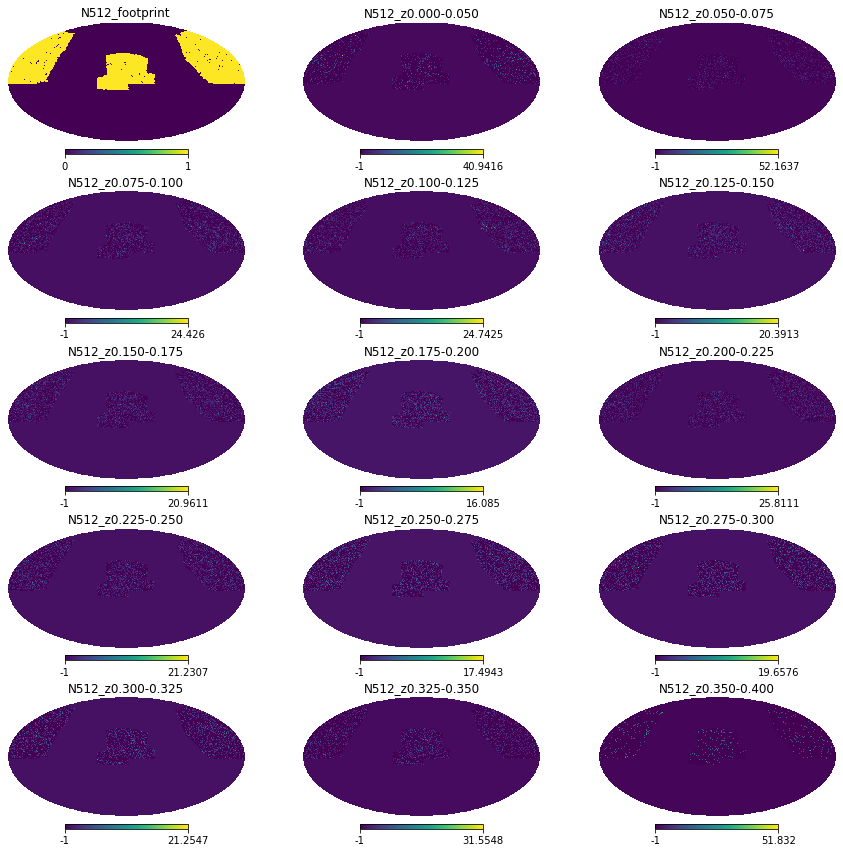

In [17]:
# save config
formato = 'png'
mkdirPath = "./maps"
saveName ="MapMatrix"

os.system("mkdir -p " + mkdirPath)

path = os.path.join(mkdirPath, str(saveName+"."+formato))
plotmatrixmaps(allPaths,save=False, savePath = path)

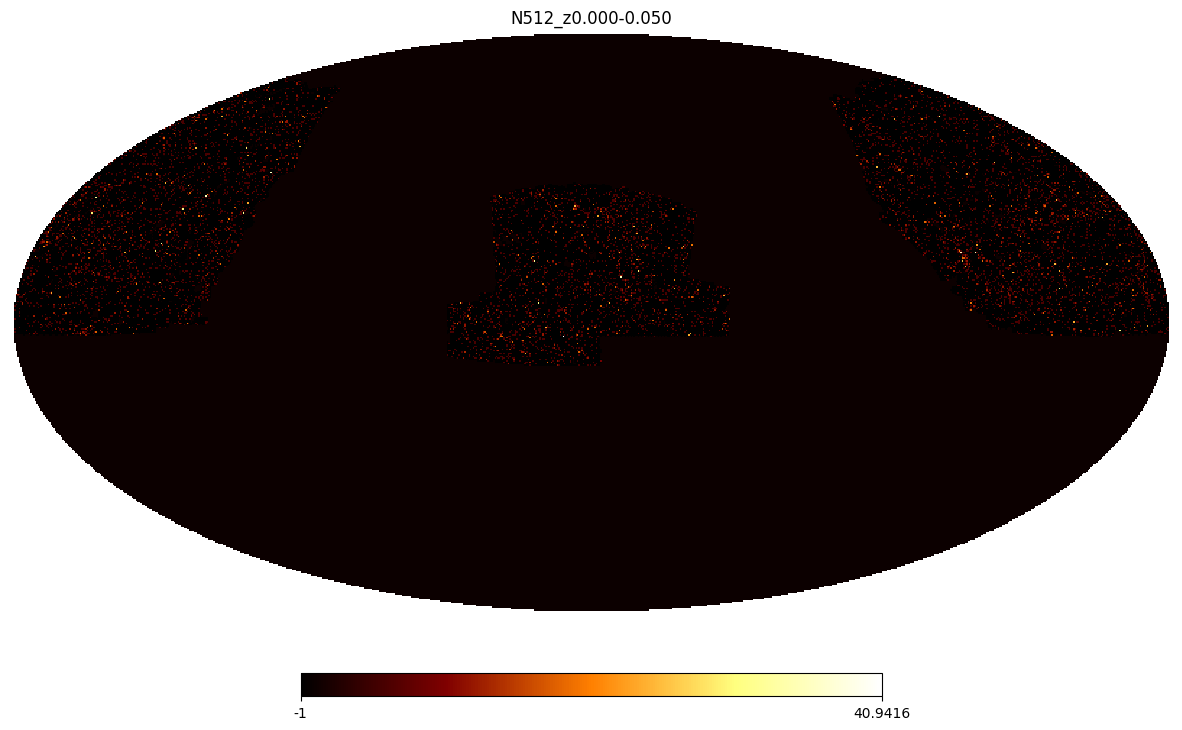

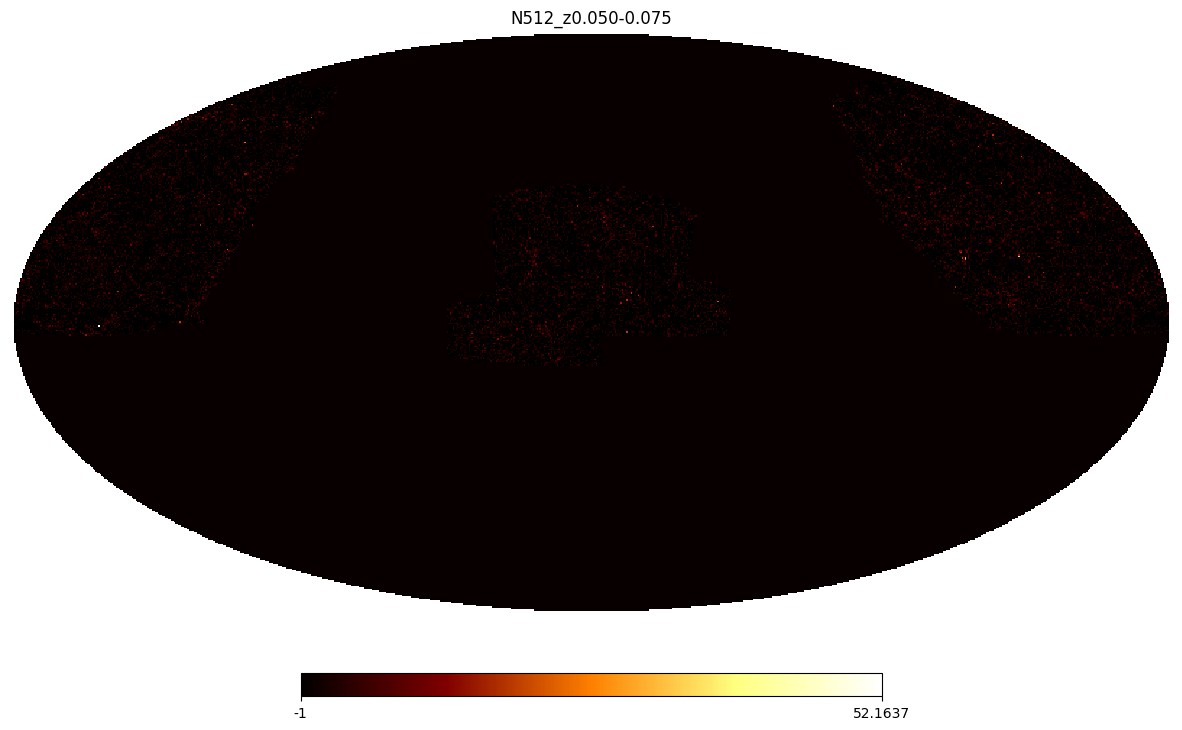

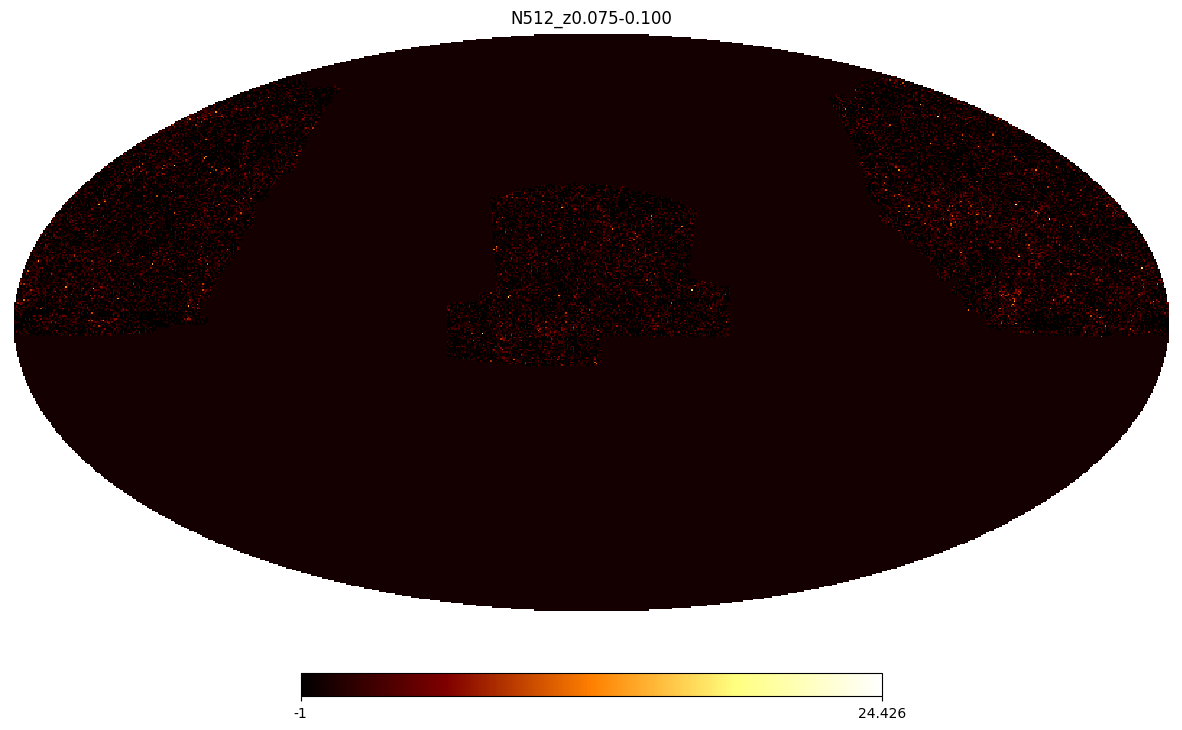

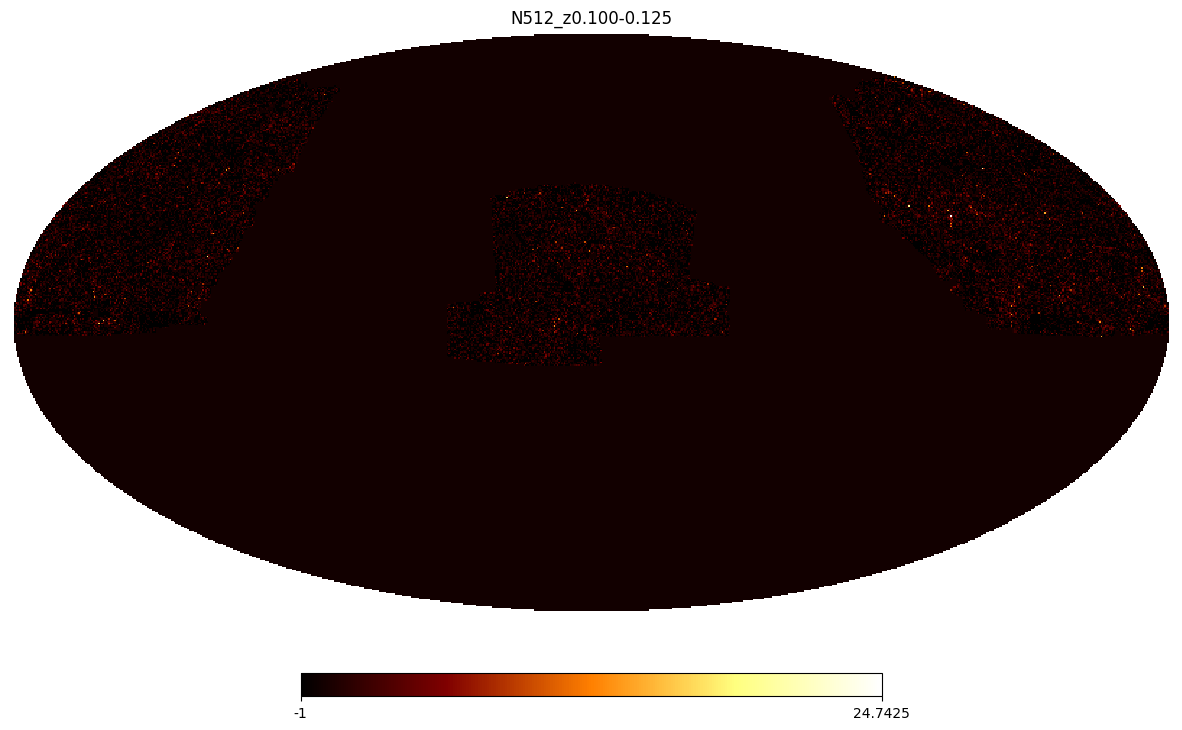

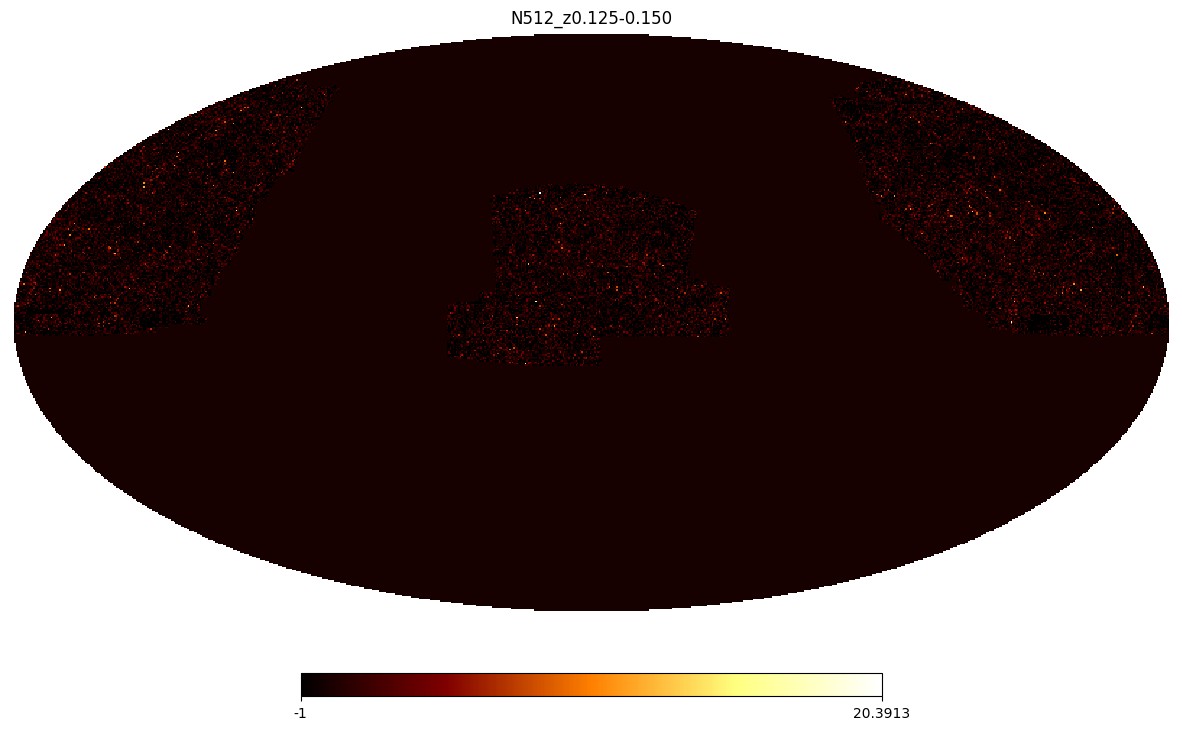

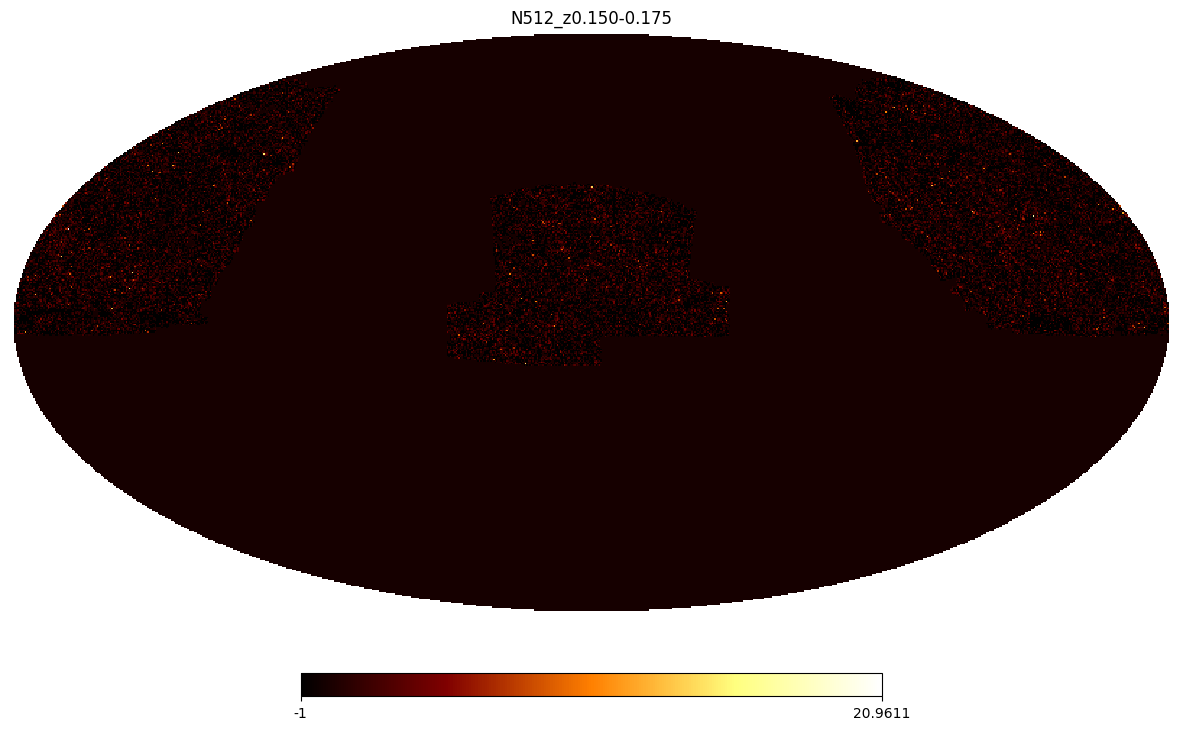

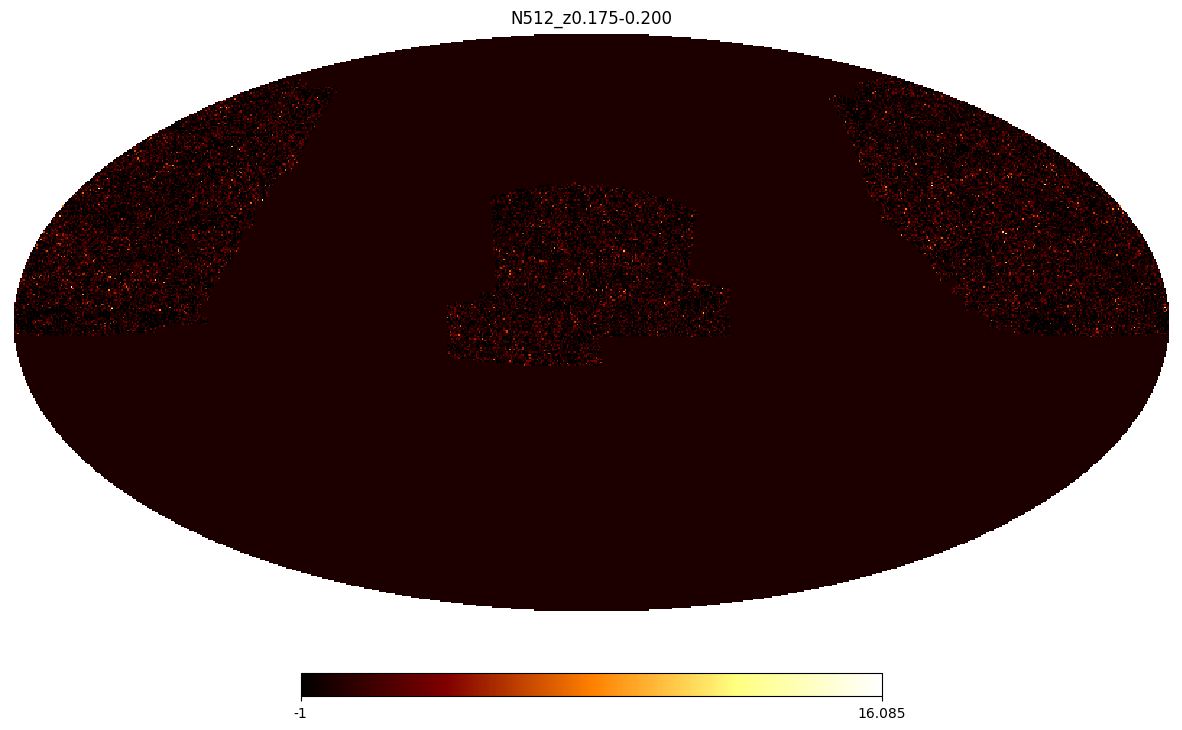

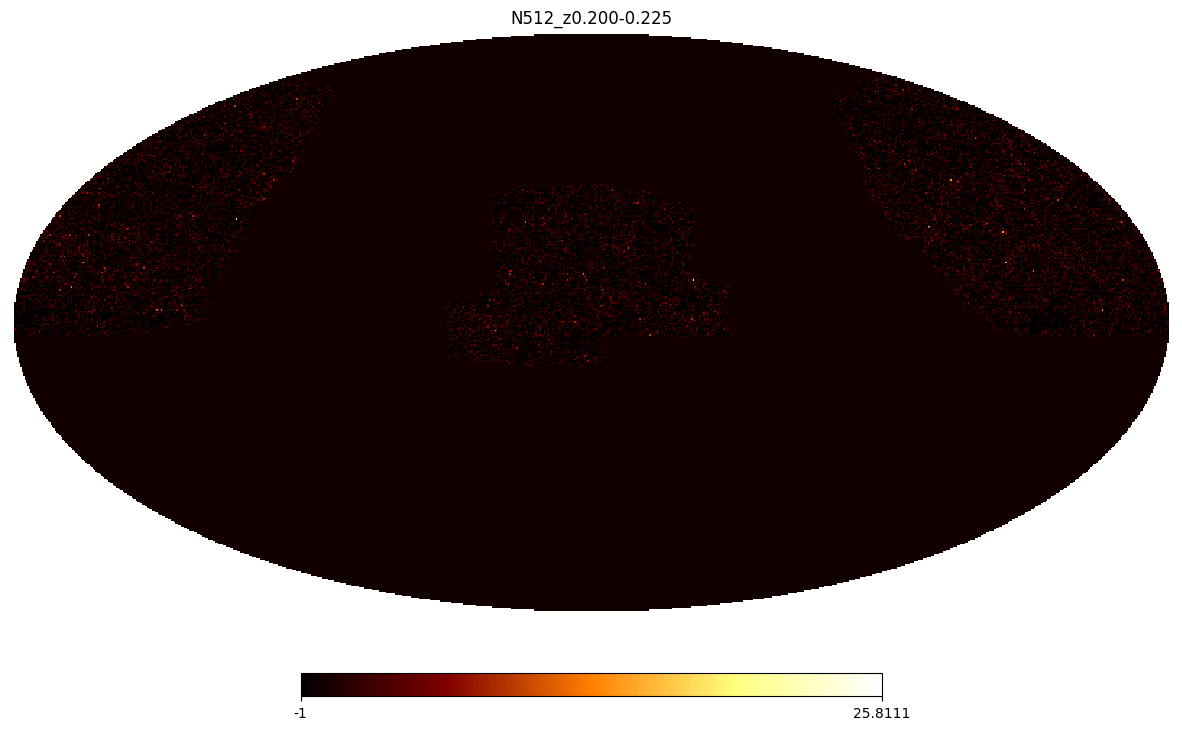

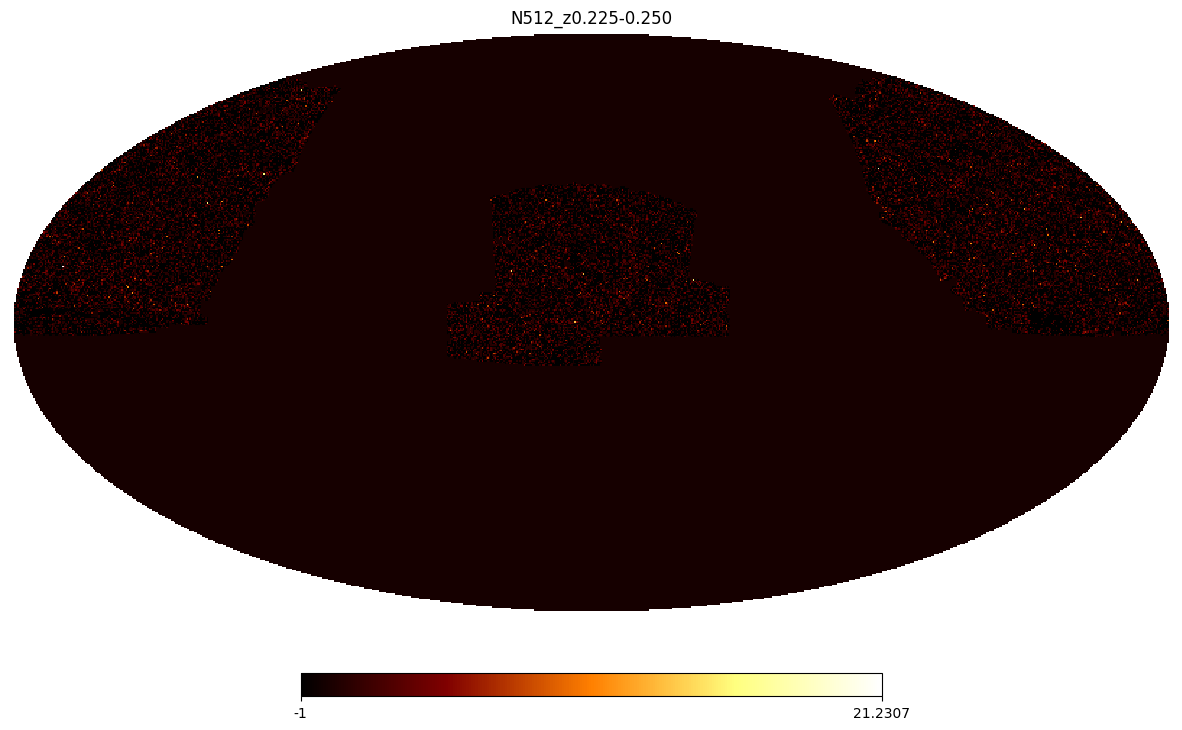

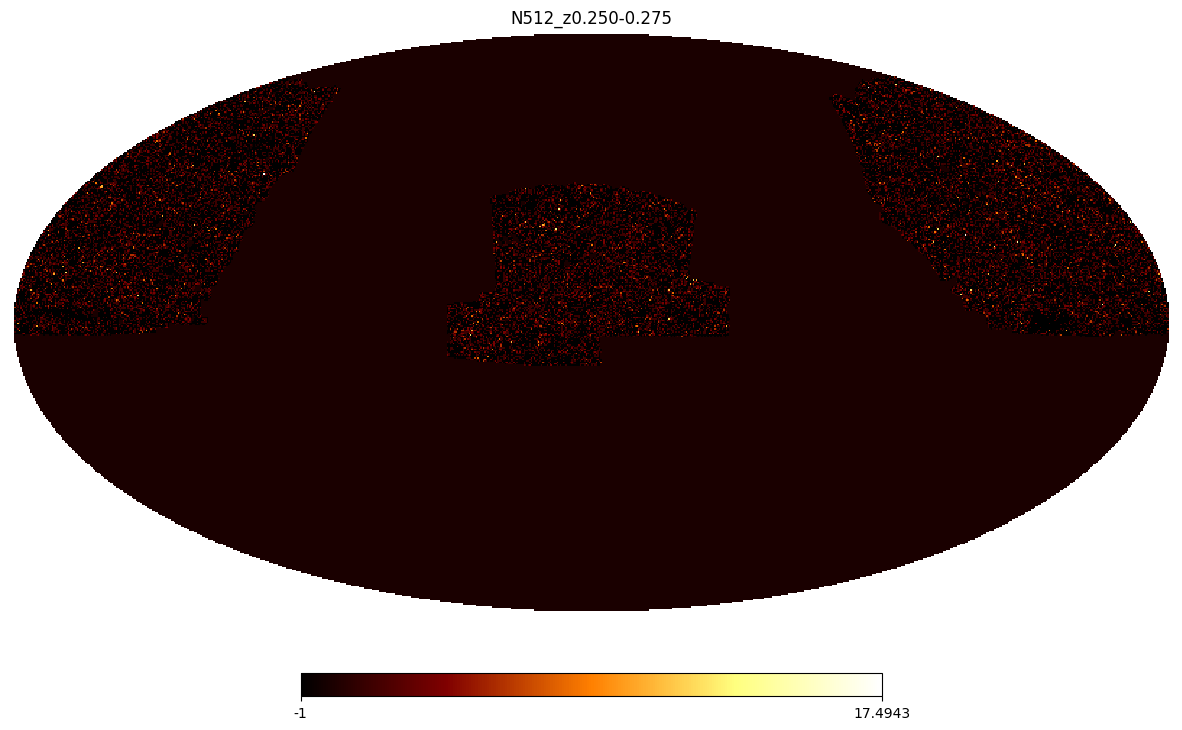

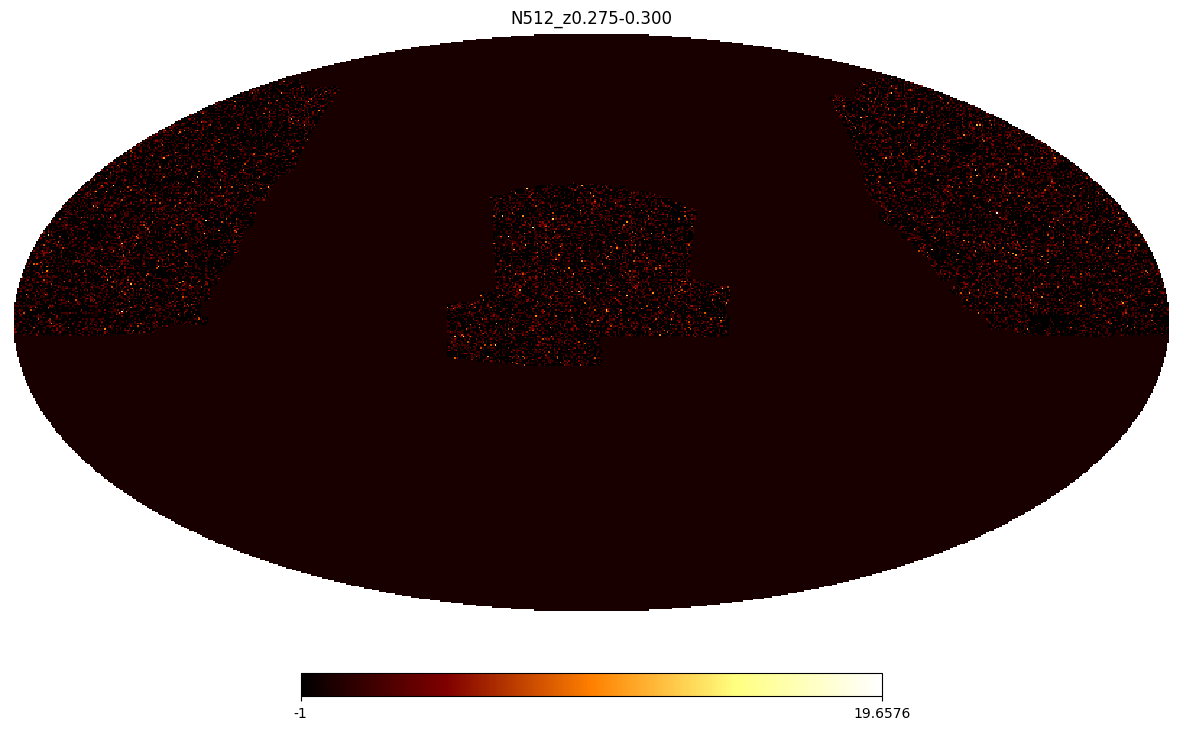

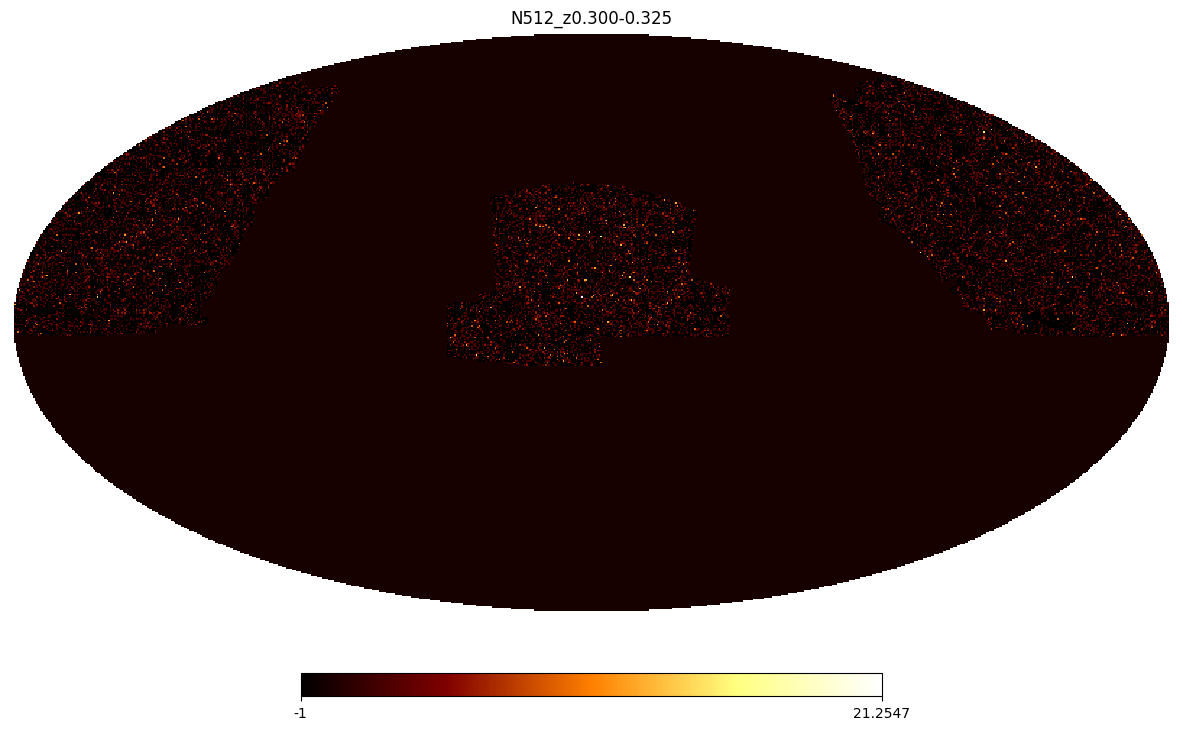

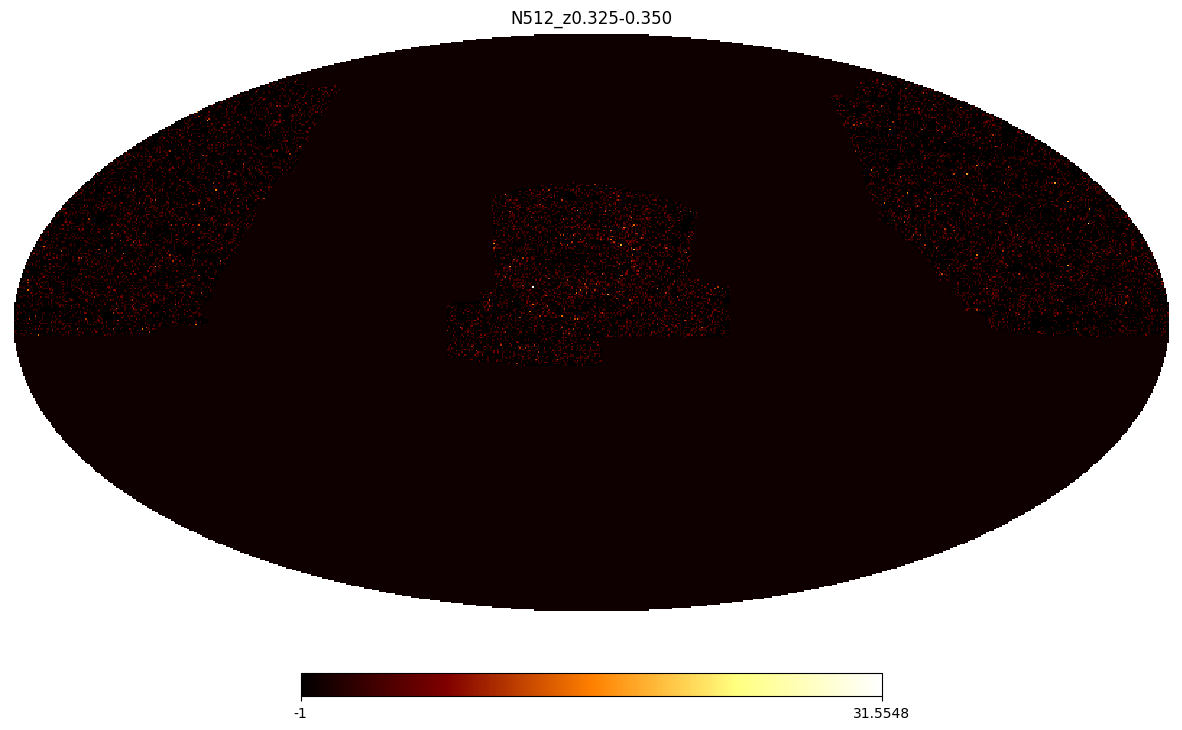

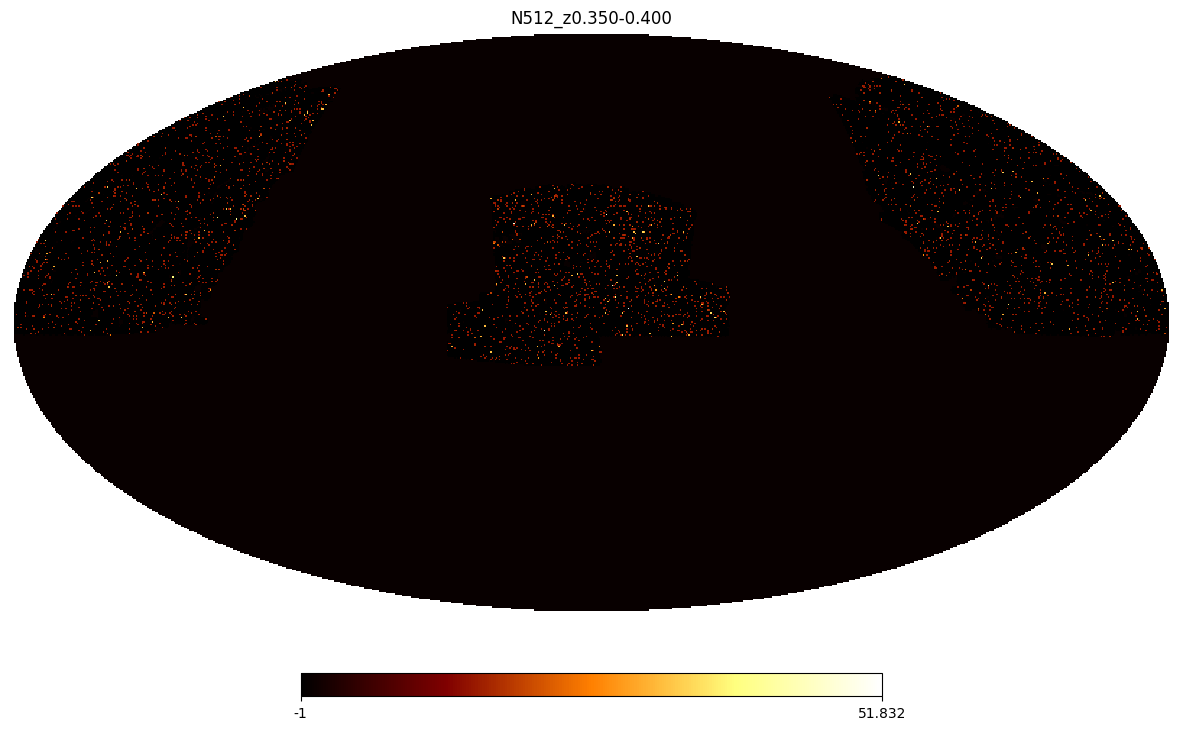

In [35]:
# Plot maps

# Mask
# maskPath = [config['footprintmask']]
# plot(maskPath, save=False)

# Maps
# mapsPath = glob.glob(config['mapsdir']+"/*.fits")
plot(mapsPath, save=False)

## Distribution: nbar weighted steradian

In [12]:
# # Plot maps

# # Mask
# maskPath = [config['footprintmask']]

# # Maps
# mapsPath = natsorted(glob.glob(config['mapsdir']+"/*.fits"))

# allPaths = maskPath + mapsPath

over = dens - media / media

dens = over*media + media

In [13]:
# def plotmatrixmaps(allPaths, save=False)->None:
#     mapas = [hp.read_map(allPaths[k]) for k in range(len(mapsPath))]

#     n=int(config['nbins'])
#     # List of maps
#     # mapas = [hp.read_map(mapsPath[k]) for k in range(len(mapsPath))]

#     # Ploting matrix
#     # linhas = int(np.sqrt(n))
#     # colunas = int(np.ceil(n / linhas))
#     linhas = 5
#     colunas = 3

#     # Criar a figura e os subplots
#     fig, axs = plt.subplots(linhas, colunas, figsize=(15, 15))

#     if linhas*colunas > len(mapas):
#         mapsPath.append(None)
#         mapas.append(None)

#     # maps subplot
#     for i, mapa in enumerate(mapas):
#         linha = i // colunas
#         coluna = i % colunas
#         plt.axes(axs[linha, coluna])
#         plt.axes(axs[linha, coluna]).axis('off')

#         titleValue = allPaths[i].split("/")[-1][:-5]
#         hp.mollview(mapa, hold=True, title = titleValue)

#     if save:
#         savePath = os.path.join(mkdirPath, str(titleValue+"."+formato))
#         plt.savefig(savePath, format=formato)

#     # Ajusting space
#     plt.tight_layout()

#     plt.show()

In [65]:
ntot = []
nbar = []
for k in range(int(config['nbins'])):
#     mapa = hp.read_map(mapsPath[k])
    hdul = fits.open(mapsPath[k])
    hdr = hdul[1].header
    
    ntot.append(hdr['HIERARCH ntot_weighted'])
    nbar.append(hdr['HIERARCH nbar_weighted_steradian'])

In [62]:
hdr

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096 / length of dimension 1                          
NAXIS2  =                 3072 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'T       '                                                            
TFORM1  = '1024E   '                                                            
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
EXTNAME = 'xtension'        

In [72]:
def nbarplot(nbar, save=False):
    titleValue = r"$\overline{n}$ weighted steradian"
    plt.title(titleValue, size=15)

    plt.bar(np.arange(0,14,1),nbar, color='indigo');

    plt.xlabel('map', size=15)
    plt.ylabel(r'$\overline{n}$', size=15)

    # plt.axes.ticklabel_format(axis='y',style='scientific')
    # plt.ticklabel_format(axis='y', style='scientific')

    if save:
        savePath = os.path.join(mkdirPath, str('nbar'+"."+formato))
        plt.savefig(savePath, format=formato)

    plt.show()

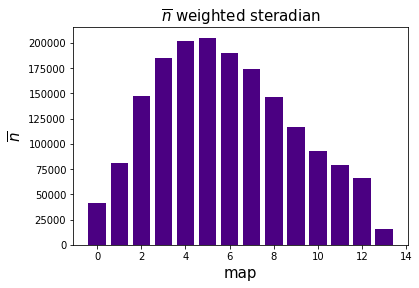

In [74]:
nbarplot(nbar,save=False)

# Pseudo Power Spectrum

In [ ]:
folder = "./output/maps"
os.system('mkdir -p '+folder)

In [82]:
def ps(mapsPath, save=False):
    for k in range(int(config['nbins'])):
        fig = plt.figure(figsize=(12,5))

        titleValue = mapsPath[k].split("/")[-1][:-5]
        plt.title(titleValue,size=15)

        path = config['clmapsdir']+"/cls/Cl-f1z"+str(k+1)+"f1z"+str(k+1)+".dat"
        cl = np.loadtxt(path)
        plt.plot(cl[2:,0],cl[2:,1], label=r"$C\ell$")

        path = config['clmapsdir']+"/sls/Sl-f1z"+str(k+1)+"f1z"+str(k+1)+".dat"
        sl = np.loadtxt(path)
        plt.plot(sl[2:,0],sl[2:,1], label=r"S$\ell$")

        plt.xscale('log')
        plt.yscale('log')
        
        plt.xlabel(r'$\ell$',size=15)
        plt.ylabel(r'$PS$',size=15)
        
        plt.legend()
        
        if save:
            # saving
            savePath = os.path.join(folder, str(titleValue+"."+formato))
            plt.savefig(savePath, format=formato)

        plt.show()

In [36]:
clPaths = []
for k in range(int(config['nbins'])):
    path = config['clmapsdir']+"/cls/Cl-f1z"+str(k+1)+"f1z"+str(k+1)+".dat"
    clPaths = clPaths + [path]

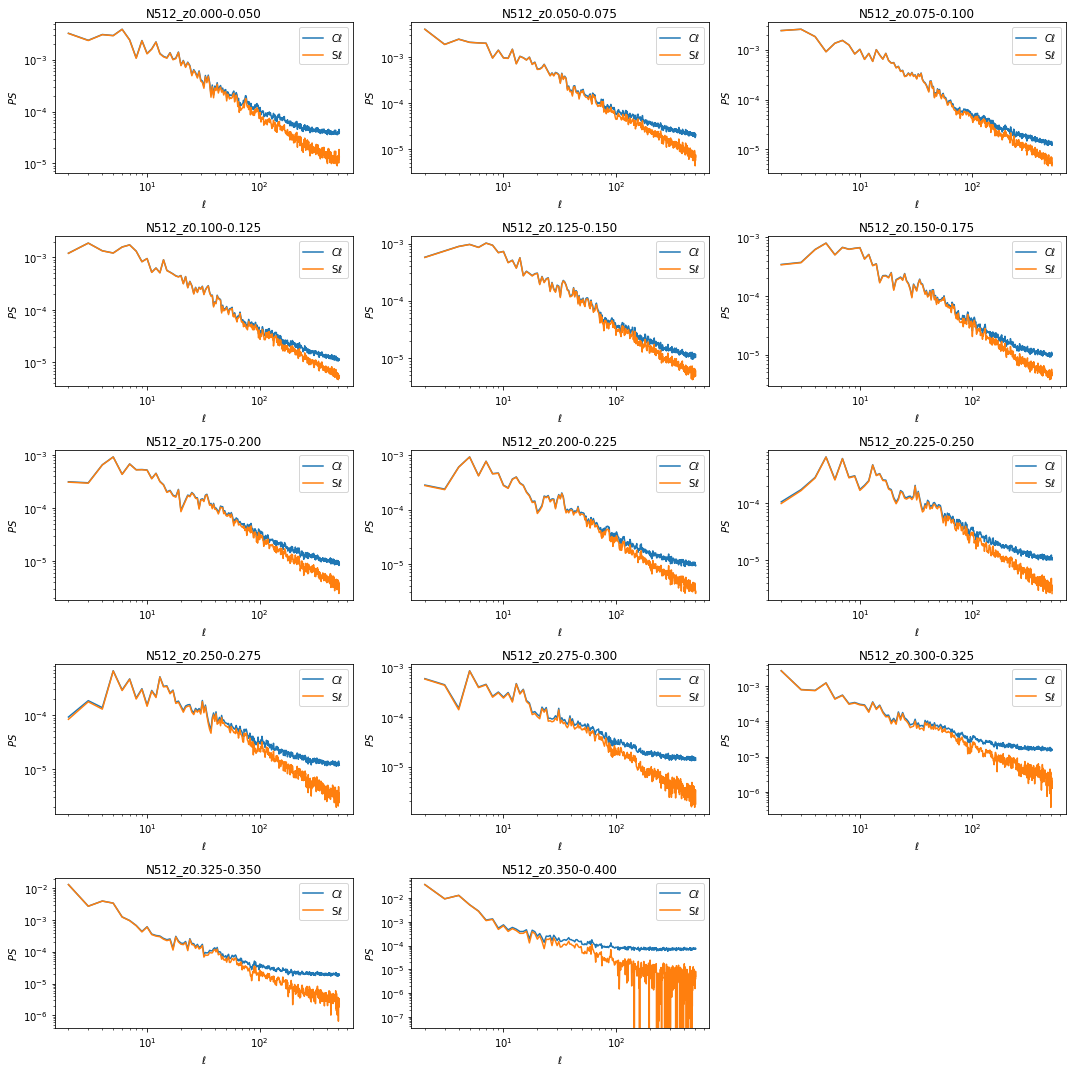

In [77]:
# Configurar a matriz de plotagem
# linhas = int(np.sqrt(n))
# colunas = int(np.ceil(n / linhas))
linhas = 5
colunas = 3

# while linhas*colunas > len(config['nbins']):
#     mapsPath.append(None)
#     mapas.append(None)

# Criar a figura e os subplots
fig, axs = plt.subplots(linhas, colunas, figsize=(15, 15))

for k in range(linhas*colunas):
    linha = k // colunas
    coluna = k % colunas

    plt.axes(axs[linha, coluna])
    
    # if don't have map to plot:
    if k+1>int(config['nbins']):
        plt.axes(axs[linha, coluna]).axis('off')
        continue

    plt.title(str(k))

    titleValue = mapsPath[k].split("/")[-1][:-5]
    plt.title(titleValue)

    path = config['clmapsdir']+"/cls/Cl-f1z"+str(k+1)+"f1z"+str(k+1)+".dat"
    cl = np.loadtxt(path)
    plt.plot(cl[2:,0],cl[2:,1], label=r"$C\ell$")

    path = config['clmapsdir']+"/sls/Sl-f1z"+str(k+1)+"f1z"+str(k+1)+".dat"
    sl = np.loadtxt(path)
    plt.plot(sl[2:,0],sl[2:,1], label=r"S$\ell$")
    
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$PS$')

    plt.xscale('log')
    plt.yscale('log')

    plt.legend()
    
plt.tight_layout()

# # saving
# savePath = os.path.join(folder, str('APSMatrix'+"."+formato))
# plt.savefig(savePath, format=formato)

plt.show()

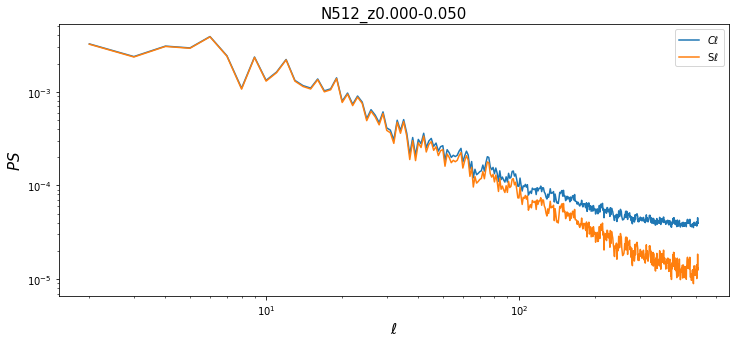

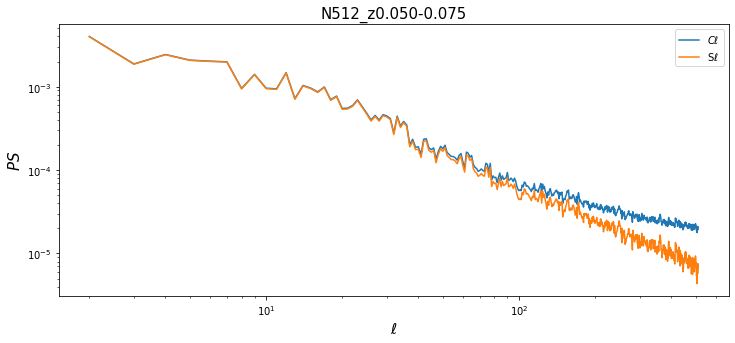

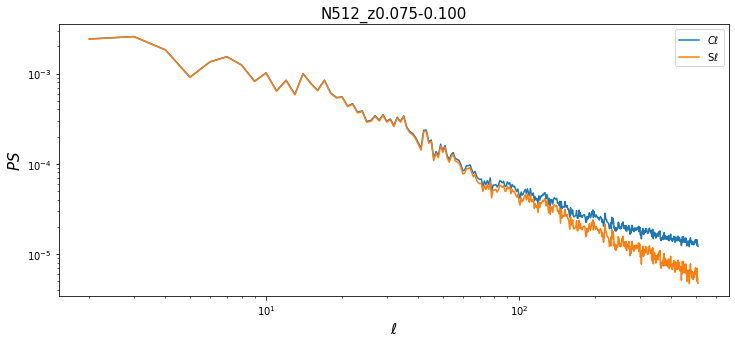

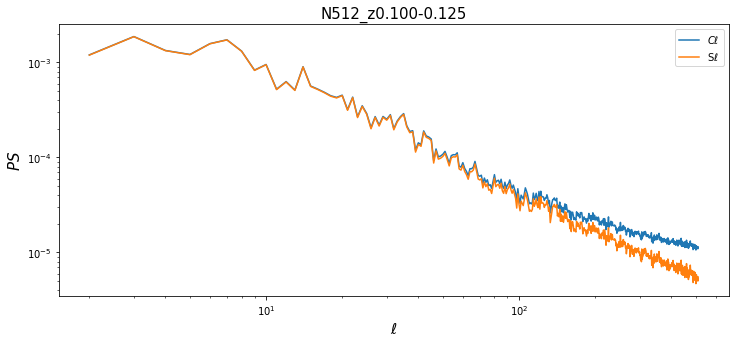

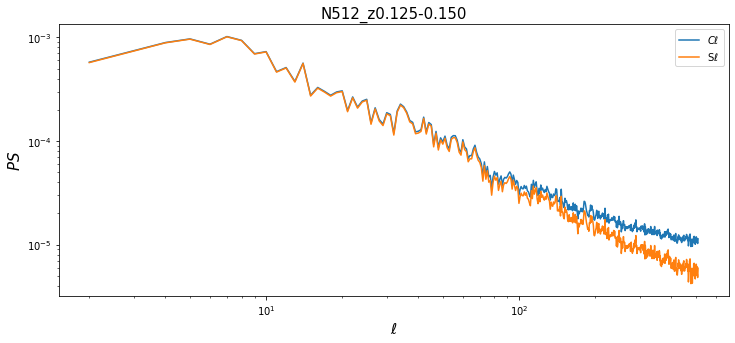

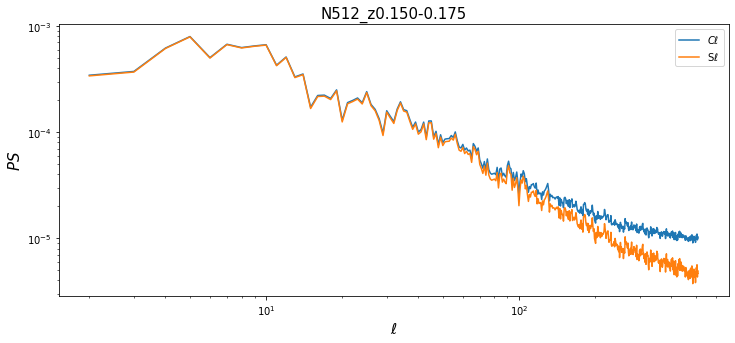

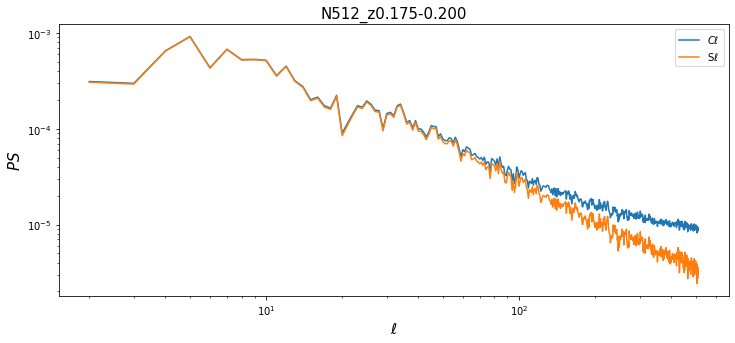

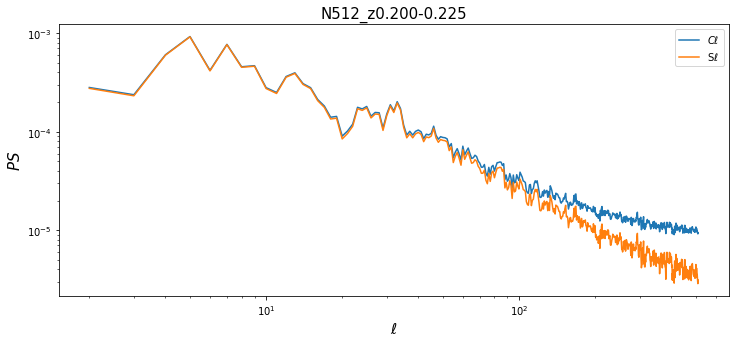

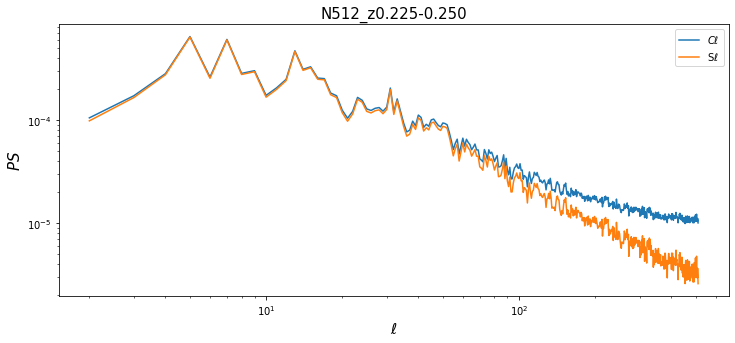

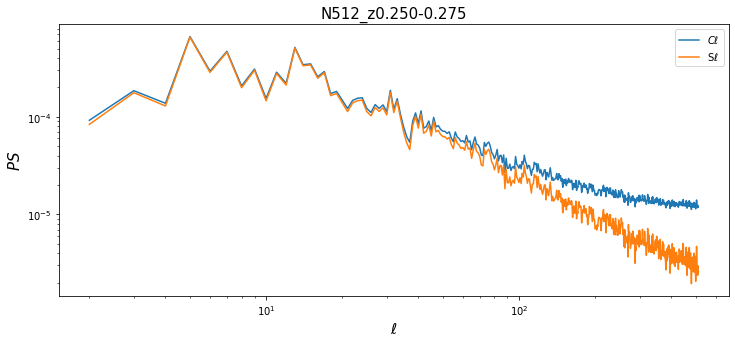

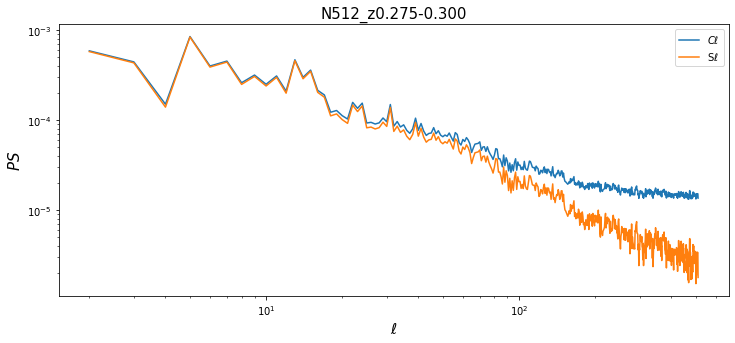

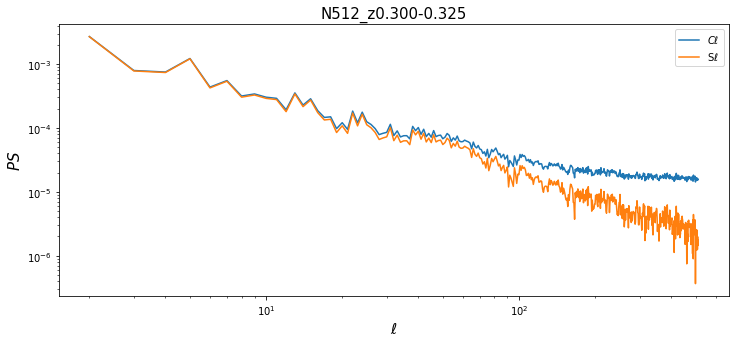

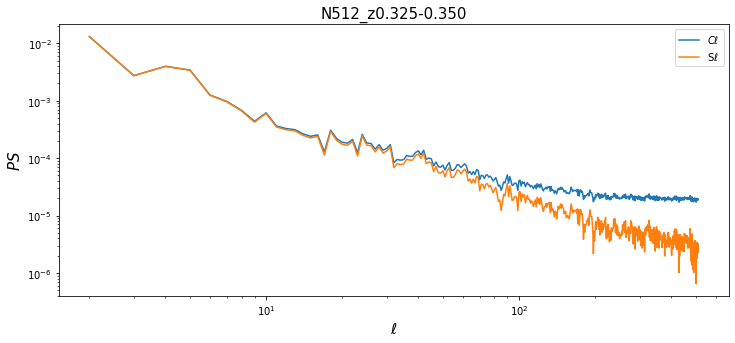

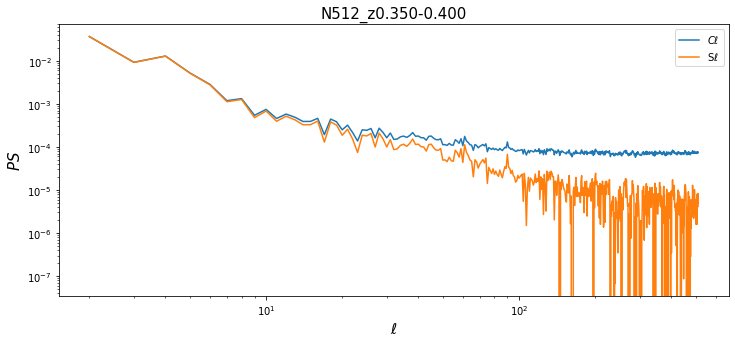

In [83]:
mapsPath = natsorted(glob.glob(config['mapsdir']+"/*.fits"))
ps(mapsPath, save=False)